# CodeAlpha Internship
## Task 3: Handwritten Character Recognition
## 📌 Project Objective

The objective of this project is to recognize handwritten digits using image processing and deep learning techniques.  
A Convolutional Neural Network (CNN) is used to automatically learn features from handwritten images.
  



# Import Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


# Load MNIST Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


# Data Preprocessing

In [4]:
# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Visualize One Image

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

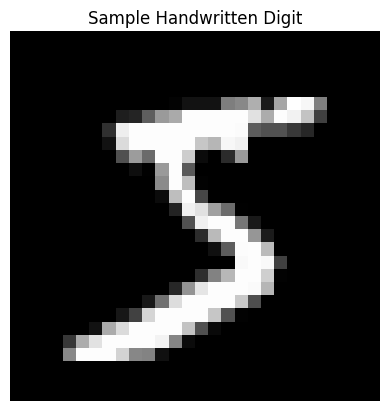

In [5]:
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.title("Sample Handwritten Digit")
plt.axis('off')


# CNN Model

In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Train Model

In [8]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 100ms/step - accuracy: 0.7850 - loss: 0.6781 - val_accuracy: 0.9765 - val_loss: 0.0751
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.9632 - loss: 0.1196 - val_accuracy: 0.9863 - val_loss: 0.0491
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 93ms/step - accuracy: 0.9760 - loss: 0.0814 - val_accuracy: 0.9873 - val_loss: 0.0411
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 92ms/step - accuracy: 0.9792 - loss: 0.0672 - val_accuracy: 0.9903 - val_loss: 0.0348
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 93ms/step - accuracy: 0.9832 - loss: 0.0597 - val_accuracy: 0.9893 - val_loss: 0.0354


#  Evaluate Mode

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9875 - loss: 0.0365
Test Accuracy: 0.9897000193595886


# Predict One Digit

In [10]:
prediction = model.predict(X_test[1].reshape(1,28,28,1))
print("Predicted Digit:", np.argmax(prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicted Digit: 2
